# Ingredients and compounds analysis

In this notebook I would like to:

- Look at the total number of ingredients
- Look at the total number of compounds
- Look at a distribution of how many compounds each ingredient has
- Look at any ingredients without compounds?

In [16]:
import pandas as pd
import os

In [17]:
# Load in the data

file_dir = os.path.dirname(os.path.abspath(""))
data_dir = os.path.join(file_dir, 'data/')
comp_info = pd.read_csv(data_dir + 'comp_info.tsv', sep='\t', header=0, index_col=0)
ingr_info = pd.read_csv(data_dir + 'ingr_info.tsv', sep='\t', header=0, index_col=0)
ingr_comp = pd.read_csv(data_dir + 'ingr_comp.tsv', sep='\t', header=0)

In [18]:
# View a sample of each table
comp_info.head()

,Compound name,CAS number
# id,,
0,jasmone,488-10-8
1,5-methylhexanoic_acid,628-46-6
2,l-glutamine,56-85-9
3,1-methyl-3-methoxy-4-isopropylbenzene,1076-56-8
4,methyl-3-phenylpropionate,103-25-3


In [19]:
ingr_info.head()

,ingredient name,category
# id,,
0,magnolia_tripetala,flower
1,calyptranthes_parriculata,plant
2,chamaecyparis_pisifera_oil,plant derivative
3,mackerel,fish/seafood
4,mimusops_elengi_flower,flower


In [20]:
ingr_comp.head()

,# ingredient id,compound id
0,1392,906
1,1259,861
2,1079,673
3,22,906
4,103,906


## Number of ingredients


In [21]:
num_unique_ings = ingr_comp['# ingredient id'].nunique()
print("The number of ingredients are {}".format(len(ingr_info)))
print("The number of ingredients appearing in the ingr_comp pairings are {}".format(num_unique_ings))
ing_ingr_comp = pd.merge(ingr_info, ingr_comp,left_index=True, right_on='# ingredient id',how="outer",indicator=True)
not_joined_ings = ing_ingr_comp[ing_ingr_comp['_merge']=='left_only']
not_joined_ings_names = not_joined_ings['ingredient name'].values
if num_unique_ings != len(ingr_info):
    print("There are {} ingredients not appearing in the ingr_comp table. These are {}".format(len(ingr_info)-num_unique_ings, not_joined_ings_names))


The number of ingredients are 1530
The number of ingredients appearing in the ingr_comp pairings are 1525
There are 5 ingredients not appearing in the ingr_comp table. These are ['estragon_oil' 'japanese_hop_oil' 'sesame_seed_oil' 'abies_sibirica_oil'
 'bitter_almond_oil']


## Number of unique compounds



In [22]:
num_unique_comps = ingr_comp['compound id'].nunique()
print("The number of compounds are {}".format(len(comp_info)))
print("The number of ingredients appearing in the ingr_comp pairings are {}".format(num_unique_comps))
comp_ingr_comp = pd.merge(comp_info, ingr_comp,left_index=True, right_on='compound id',how="outer",indicator=True)
not_joined_comps = comp_ingr_comp[comp_ingr_comp['_merge']=='left_only']
not_joined_comps_names = not_joined_comps['Compound name'].values
if num_unique_comps != len(comp_info):
    print("There are {} compounds not appearing in the ingr_comp table. These are {}".format(num_unique_comps, not_joined_comps_names))

The number of compounds are 1107
The number of ingredients appearing in the ingr_comp pairings are 1107


## Histogram of the number of compounds per ingredient


In [23]:
ingr_comp['Comp Counts'] = ingr_comp.groupby(['# ingredient id']).transform('count')
ing_comp_group = ingr_comp.groupby(['# ingredient id'], as_index=False).first()
ing_comp_group.drop(columns=['compound id'], inplace=True)

comp_value_counts = pd.merge(ing_comp_group, ingr_info, left_on='# ingredient id', right_index=True)
comp_value_counts.drop(columns=['# ingredient id'], inplace=True)
comp_value_counts.sort_values(by='Comp Counts', ascending=False, inplace=True)
comp_value_counts.head(25)

,Comp Counts,ingredient name,category
905,239,black_tea,plant derivative
628,234,coffee,plant derivative
504,230,bantu_beer,alcoholic beverage
1490,227,beer,alcoholic beverage
1423,222,white_wine,alcoholic beverage
359,217,grilled_beef,meat
257,216,roasted_beef,meat
622,206,boiled_beef,meat
955,204,fried_beef,meat
247,199,beef,meat


Text(0, 0.5, 'Number of ingredients')

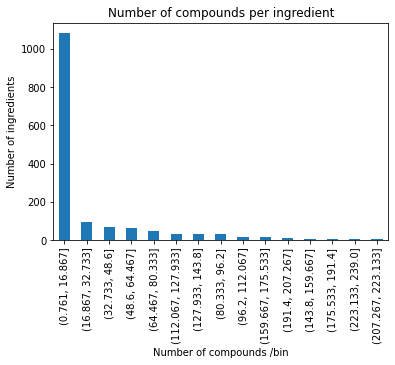

In [24]:
comp_value_counts = ing_comp_group['Comp Counts'].value_counts(bins=15)
ax = comp_value_counts.plot(kind='bar', title='Number of compounds per ingredient')
ax.set_xlabel('Number of compounds /bin')
ax.set_ylabel('Number of ingredients')

In [26]:
print("The average (mean) number of flavour compounds per ingredient is {}".format(ing_comp_group['Comp Counts'].mean()))
print("The average (median) number of flavour compounds per ingredient is {}".format(ing_comp_group['Comp Counts'].median()))

The average (mean) number of flavour compounds per ingredient is 24.118688524590166
The average (median) number of flavour compounds per ingredient is 2.0
